# match_to_profile
This module performs match analysis to find genes or features that match a given phenotype best.

For example, you could use this module to find genes whose expression levels match and oppose a specific gene expression for a given set of samples. In this notebook we will use gene M89957_at [IGB Immunoglobulin-associated beta (B29)] as the profile to match.

A note on some of the parameters we are using:
- **gene expression**: We use the classic ALL/AML microarray dataset http://datasets.genepattern.org/all_aml/all_aml_test.gct

- **phenotype input method**: We use the default value **Index**. GCT files are by default indexed by their first column (which should containe gene name).

- **phenotype file**: We leave this blank because in this example we are not using a CLS file to identify the samples' phenotype.

- **name of phenotype to match**: Within the GCT file we provide we will use the gene **M89957_at**.

In [4]:
import genepattern
import cuzcatlan as cusca

from cuzcatlan import match_to_profile
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(match_to_profile, name="Differential gene expression, continous pheotype.", 
                        description="Sort genes according to their association with a continuous phenotype or class vector.",
                        parameters={
                            "phenotype_input_method":{"description":"Select from the dropdown the type of input you have provided",
                                                      "default": "Index",
                                                      "choices":{'CLS --> Fill out the "phenotype file" parameter':"CLS",
                                                                 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters':"Name",
                                                                 'Index --> Fill out the "name of phenotype to match" parameter with value of index':"Index"
                                                                }
                                                     },
                            "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a continuous phenotype or class vector.', function_import='match_to_profile', name='Differential gene expression, continous pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'choices': []}, {'name': 'phenotype_input_method', 'label': 'phenotype_input_method', 'optional': False, 'default': 'Index', 'description': 'Select from the dropdown the type of input you have provided', 'hide': False, 'choices': {'CLS --> Fill out the "phenotype file" parameter': 'CLS', 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters': 'Name', 'Index --> Fill out the "name of phenotype to match" parameter with value of index': 'Index'}}, {'name': 'phenotypes_file', 'label': 'phenotypes_file', 'optional': True, 'default': None, 'description': 'Type the file name of the CLS file where the phenotypes are listed', 'hide': False, 'choices': []}, {'name': 'phenotype_column', 'label': 'phenotype_column', 'optional': True, 'default': None, 'description': 'The column name in the GCT file where the gene name is present', 'hide': False, 'choices': []}, {'name': 'name_of_phenotype_to_match', 'label': 'name_of_phenotype_to_match', 'optional': True, 'default': None, 'description': 'The row/gene names the phenotype to match', 'hide': False, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': True, 'default': None, 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': True, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': None, 'description': 'The title of the heatmap', 'hide': False, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x108539d90> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


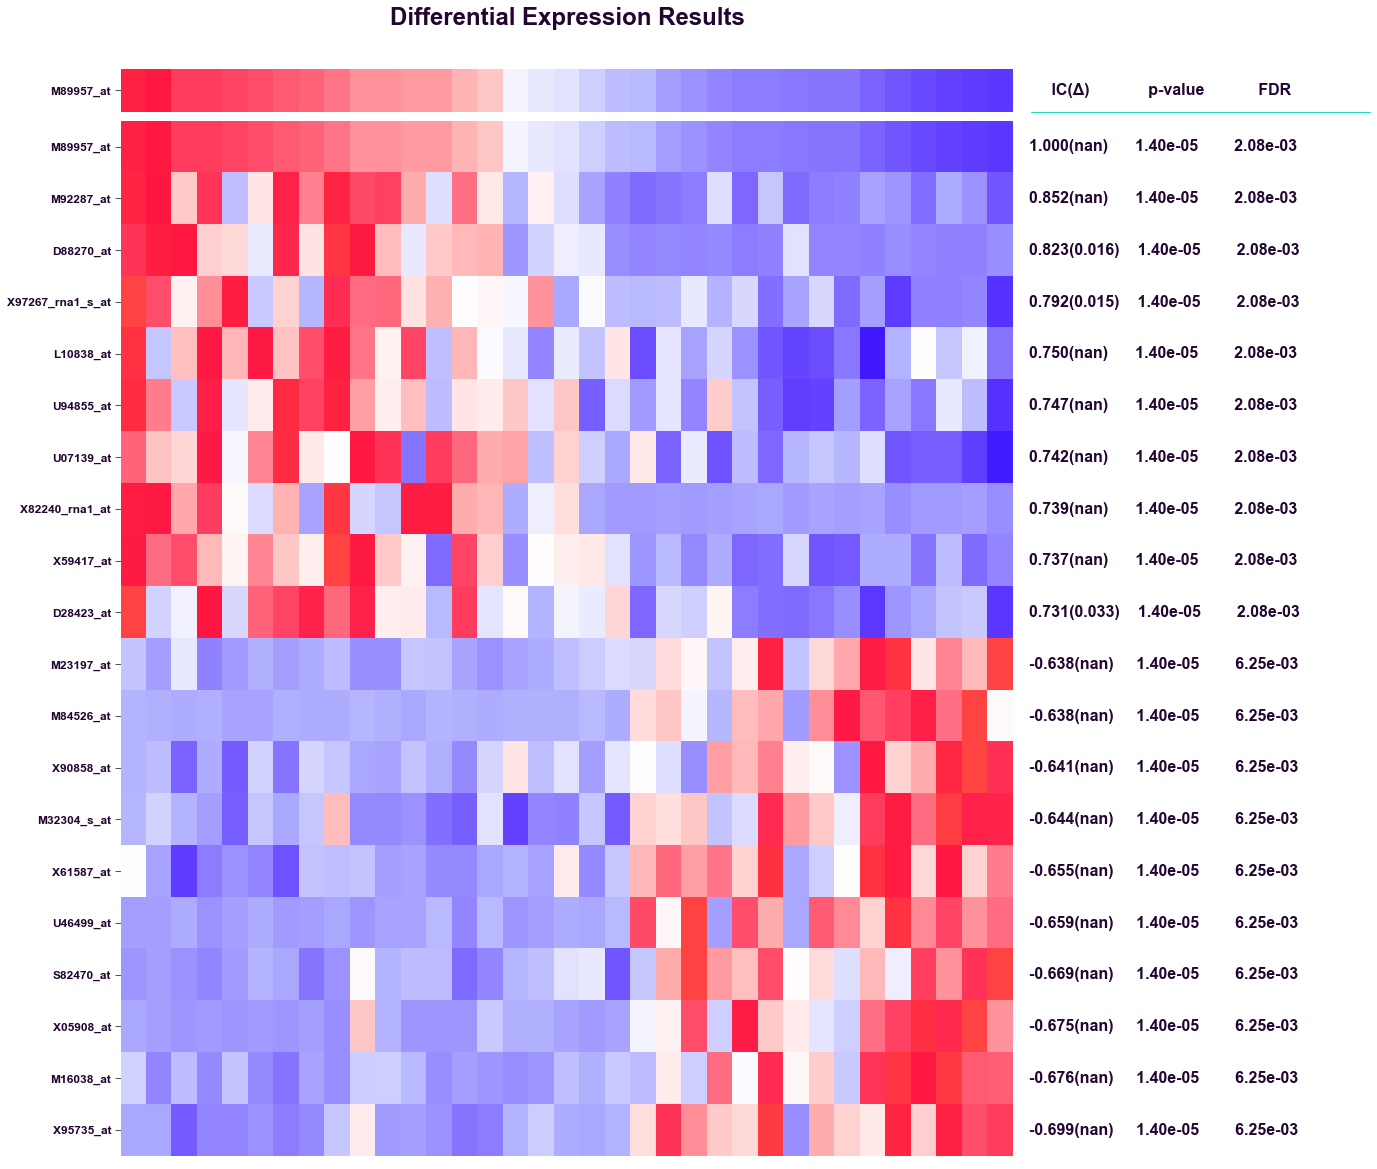

In [8]:
diffex_results = match_to_profile(gene_expression="http://datasets.genepattern.org/all_aml/all_aml_test.gct", phenotype_input_method="Index", phenotypes_file="", phenotype_column="Index", name_of_phenotype_to_match="M89957_at", output_filename="", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="Differential Expression Results", random_seed=20121020)